In [266]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [267]:
### ignore warnings caused by librosa 
import warnings
warnings.filterwarnings("ignore")

In [268]:
SAMPLE_RATE = 22050

In [269]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
signal = np.sin(2*np.pi*freq*t)

# Creating spectrograms
Spectrograms provide a 2D feature space to analyze signals in the joint time-frequency domain.

This code generates the spectrogram files for use with the CNN example. It makes files for non-noised data!

In [270]:
# Just some re-shaping and dimension finding
N = 1
print("N:",N)
X_train = signal[np.newaxis,:]
print("Train shape",X_train.shape)
N_train = X_train.shape[0]
NUM_SAMPLES = X_train.shape[1]-1

N: 1
Train shape (1, 88200)


In [271]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [272]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

In [273]:
# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0]
test_spec = mel_spec(song)
print(test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

(168, 173)


In [274]:
tmp_train = np.zeros((N_train,FEATS,FRAMES))
for i in range(N_train):
    tmp_train[i,:,:] = mel_spec(X_train[i])
#np.save('Data/xtrain_spec.npy', tmp_train)

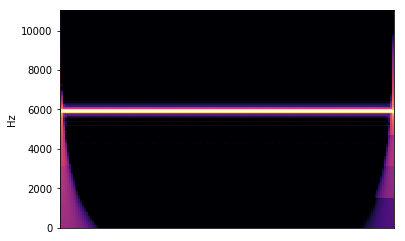

In [275]:
librosa.display.specshow(tmp_train[0], y_axis='hz')

In [328]:
print("here")
train = np.load("train.npy")
X_train = train[:,1:]
print(X_train.shape)
print(X_train.shape)
y_train = train[:,0]
print(y_train.shape)
X_labeled = X_train[y_train != -1]
y_labeled = y_train[y_train != -1]
X_unlabeled = X_train[y_train == -1]
y_unlabeled = y_train[y_train == -1]

#test data 
test = np.load("test.npy")
X_test = test[:,1:]

#reduce the dimensionality of the data using pca
# pca = PCA(n_components=2000)
# print("starting to fit")
# new_X_train = pca.fit_transform(X_train)
print("finished fitting")


# #predict test
# predictions = clf.predict(X_test)
# print(predictions.shape)

#models
#Logistic Regression
# logReg = LogisticRegression().fit(X_labeled, y_labeled)
# print("finished fitting, now predicting....")
# predictions = logReg.predict(X_test)

print("making new X")
for x in X_train:
    x = mel_spec(x)

print("mel spec new Xtest")
for x in X_test:
    x = mel_spec(x)
print("made tests")

print("fitting ....")
#Random Forest
rf = RandomForestClassifier(n_estimators=7000)
rf.fit(X_labeled, y_labeled)


here
(6374, 88200)
(6374, 88200)
(6374,)
finished fitting
making new X
mel spec new Xtest
made tests
fitting ....
finished predictions!
Added predicitions to file!


In [329]:
predictions = rf.predict(X_test)

print("finished predictions!")
# #add predictions in file
with open("predictions.csv", "w") as f:
    f.write("Id,Prediction\n")
    for i, u in enumerate(predictions):
        f.write(str(i) + "," + str(int(u)) + "\n")
print("Added predicitions to file!")


finished predictions!
Added predicitions to file!


In [293]:
print("making new X")
for x in new_X_train:
    x = mel_spec(x)

print("new x made")
# rf = RandomForestClassifier(n_estimators=5000)
# rf.fit(X_labeled, y_labeled)

making new X
new x made


In [294]:
print("making new X test")
print(X_test.shape)

new_X_test = pca.fit_transform(X_test)
print("mel spec new Xtest")
for x in new_X_test:
    x = mel_spec(x)
print("made tests")

making new X test
(951, 88200)
mel spec new Xtest
made tests


In [307]:
#Use Random Forest on the transformed data
rf = RandomForestClassifier(n_estimators= 10000)
print("fitting rf ...")
print(X_train.shape)
print(X_train.shape)
y_train = train[:,0]
print(y_train.shape)
new_X_labeled = new_X_train[y_train != -1]
y_labeled = y_train[y_train != -1]
new_X_unlabeled = new_X_train[y_train == -1]
y_unlabeled = y_train[y_train == -1]
rf.fit(new_X_labeled, y_labeled)
print("finished fitting rf ...")


fitting rf ...
(6374, 88200)
(6374, 88200)
(6374,)
finished fitting rf ...


In [325]:
#change x
# print("mel spec new Xtest")
# for x in X_test:
#     x = mel_spec(x)
# print("made tests")

predictions = np.random.randint(10, size=951)

print("finished predictions!mjhasbdak")
#add predictions in file
with open("predictions.csv", "w") as f:
    f.write("Id,Prediction\n")
    for i, u in enumerate(predictions):
        f.write(str(i) + "," + str(int(u)) + "\n")
print("Added predicitions to file!")

finished predictions!mjhasbdak
Added predicitions to file!


In [326]:
print(new_X_test.shape)

(951, 900)


In [316]:
print(rf.predict(new_X_test[:8]))


[5. 9. 5. 2. 2. 5. 9. 5.]
